## BCI 2 PFT ensemble

In [1]:
from scipy.stats import qmc
import numpy as np

import csv
import xarray as xr
import pandas as pd
import os
import netCDF4 as nc4
import sys
import shutil
from tempfile import TemporaryFile                                                                                                                                 
import argparse                                                                                                                                                                                                                                                                                                       
import tempfile 
import random
import re
import math

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import cm
import matplotlib.colors as mcolors
from matplotlib.colors import Normalize
from matplotlib.colors import BoundaryNorm


import functions_py.fates_xarray_functions as fa


In [2]:
dark = cm.get_cmap('Dark2', 8)
colormap = dark(range(8))

### Load the FATES run

In [3]:
#  local met  drivers
fates = '/pscratch/sd/j/jneedham/elm_runs/bci/mar24/bci_local_ensemble_2pfts_0324.E74c582a640-Feff4c934.2024-03-23/run/bci_local_ensemble_2pfts_0324.E74c582a640-Feff4c934.2024-03-23.h0.ensemble.sofar.nc'
fates = xr.open_dataset(fates,  decode_times=False)
time = fates.variables['time'] / 365.
cohort_size_bins = fates.variables['fates_levscls'][:]
nsizebins = len(cohort_size_bins)

tave_start =  250
tave_stop = 300

ninst = 200

In [18]:
AGB = np.squeeze(fates.FATES_VEGC_ABOVEGROUND_SZPF.sum(dim='fates_levscpf'))

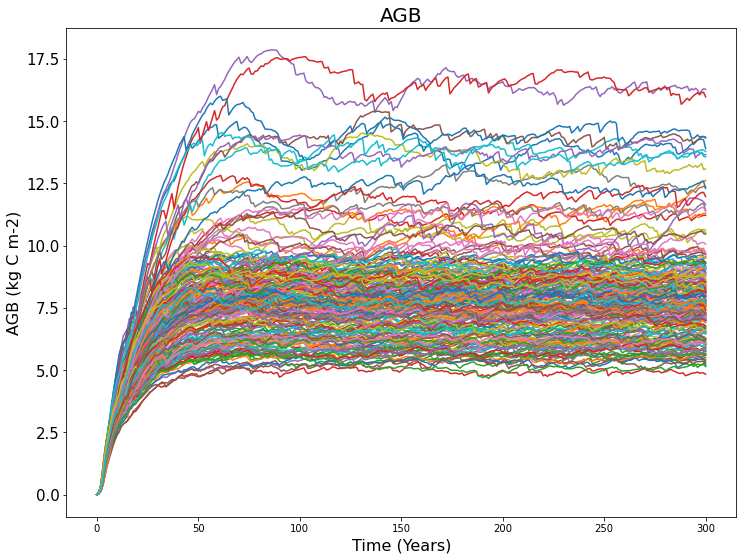

In [20]:
fig1, (f1ax1) = plt.subplots(nrows=1,ncols=1, figsize=(12,9))

for  i in range(0,ninst):
    f1ax1.plot(time, AGB[i,:])  
    #f1ax1.plot(time, AGB)

f1ax1.set_title('AGB', fontsize=20)   
f1ax1.set_xlabel(r'Time (Years)', fontsize=16)
f1ax1.set_ylabel(r'AGB (kg C m-2)', fontsize=16)
f1ax1.tick_params(axis='y', which='major', labelsize=15)  

In [21]:
LAI = np.squeeze(fates.FATES_LAI)

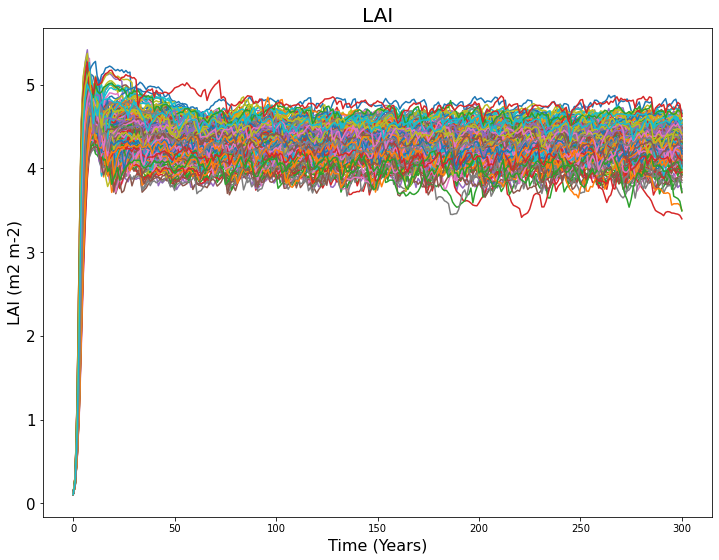

In [22]:
fig1, (f1ax1) = plt.subplots(nrows=1,ncols=1, figsize=(12,9))

for  i in range(0,ninst):
    f1ax1.plot(time, LAI[i,:])  


f1ax1.set_title('LAI', fontsize=20)   
f1ax1.set_xlabel(r'Time (Years)', fontsize=16)
f1ax1.set_ylabel(r'LAI (m2 m-2)', fontsize=16)
f1ax1.tick_params(axis='y', which='major', labelsize=15)  

### Which ones have  some coexistence in terms of AGB

In [8]:
AGB_PF = fa.scpf_to_scls_by_pft(fates.FATES_VEGC_ABOVEGROUND_SZPF, fates)
AGB_PF = AGB_PF.sum(dim='fates_levscls')
AGB_PF = AGB_PF.isel(time=slice(tave_start, tave_stop)).mean(dim='time')

In [9]:
AGB_tot = AGB_PF.sum(dim='fates_levpft')
AGB_PF1 = AGB_PF.isel(fates_levpft=0)

ratio = np.squeeze(AGB_PF1/AGB_tot)

keep = np.where((ratio >= 0.05) & (ratio <= 0.95))

num = np.array(keep).size
print(num)

print(keep)

8
(array([  1,  33,  41,  84, 116, 144, 146, 159]),)


In [10]:
test =  np.squeeze(np.array(keep))

### Subset the full FATES to just those runs with coexistence

In [11]:
test = fates.where(fates.record.isin(keep), drop=True)

In [12]:
AGB_PF = fa.scpf_to_scls_by_pft(test.FATES_VEGC_ABOVEGROUND_SZPF, test)
AGB_PF = AGB_PF.sum(dim='fates_levscls')
AGB = AGB_PF.sum(dim='fates_levpft')

Text(0.02, 0.5, 'AGB (kg C m-2)')

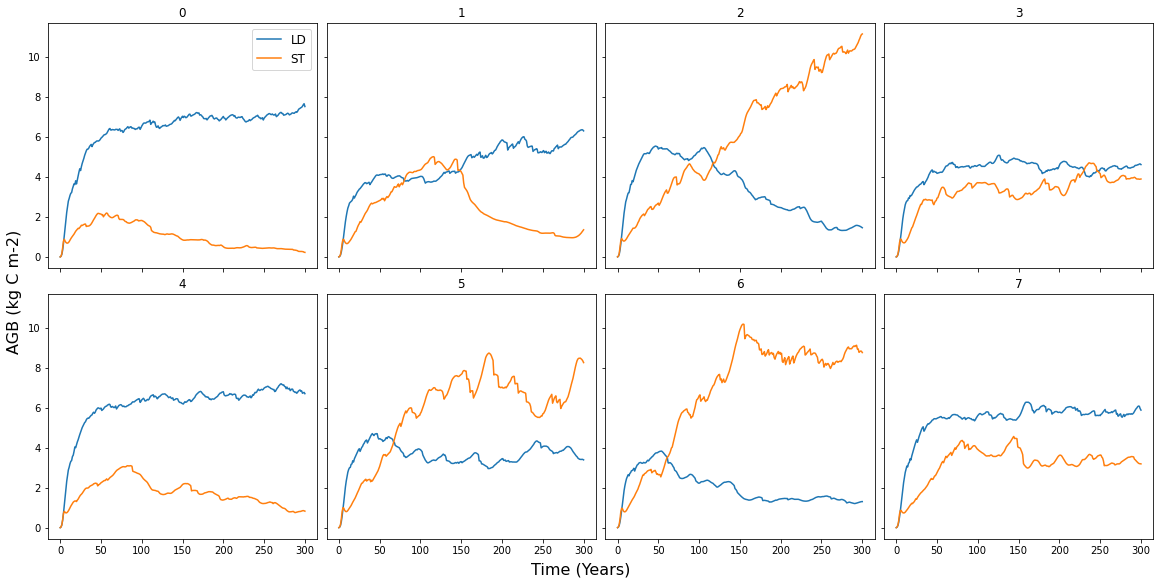

In [13]:
fig1, axs = plt.subplots(nrows=2,ncols=4, figsize=(16,8), constrained_layout=True, sharex=True, sharey=True)
axs=axs.flatten()

for  i in range(0,num):
    axs[i].plot(time, AGB_PF[i,:,0],label = 'LD')  
    axs[i].plot(time, AGB_PF[i,:,1], label = 'ST')   
    axs[i].set_title(i)
    if i == 0:
        axs[i].legend(prop={'size':12})

fig1.supxlabel(r'Time (Years)', fontsize=16)
fig1.supylabel(r'AGB (kg C m-2)', fontsize=16)


Text(0.02, 0.5, 'AGB (kg C m-2)')

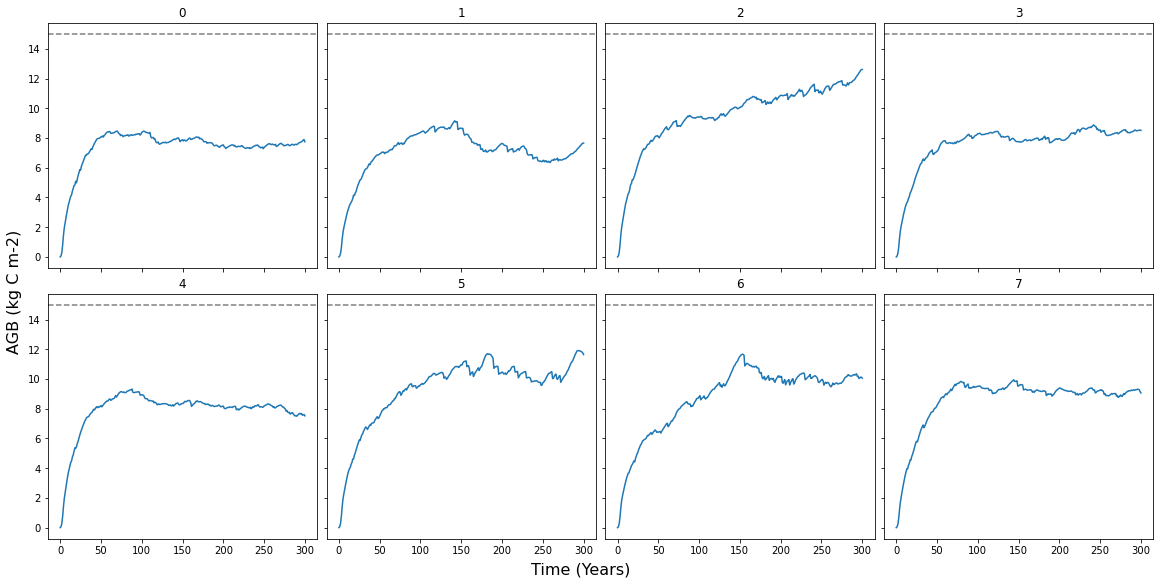

In [14]:
fig1, axs = plt.subplots(nrows=2,ncols=4, figsize=(16,8), constrained_layout=True, sharex=True, sharey=True)
axs=axs.flatten()

for  i in range(0,num):
    axs[i].plot(time, AGB[i,:])   
    axs[i].set_title(i)
    axs[i].axhline(y=15.0, color='grey', linestyle='--')
    
fig1.supxlabel(r'Time (Years)', fontsize=16)
fig1.supylabel(r'AGB (kg C m-2)', fontsize=16)


In [15]:
lai = test.FATES_LAI

Text(0.02, 0.5, 'LAI')

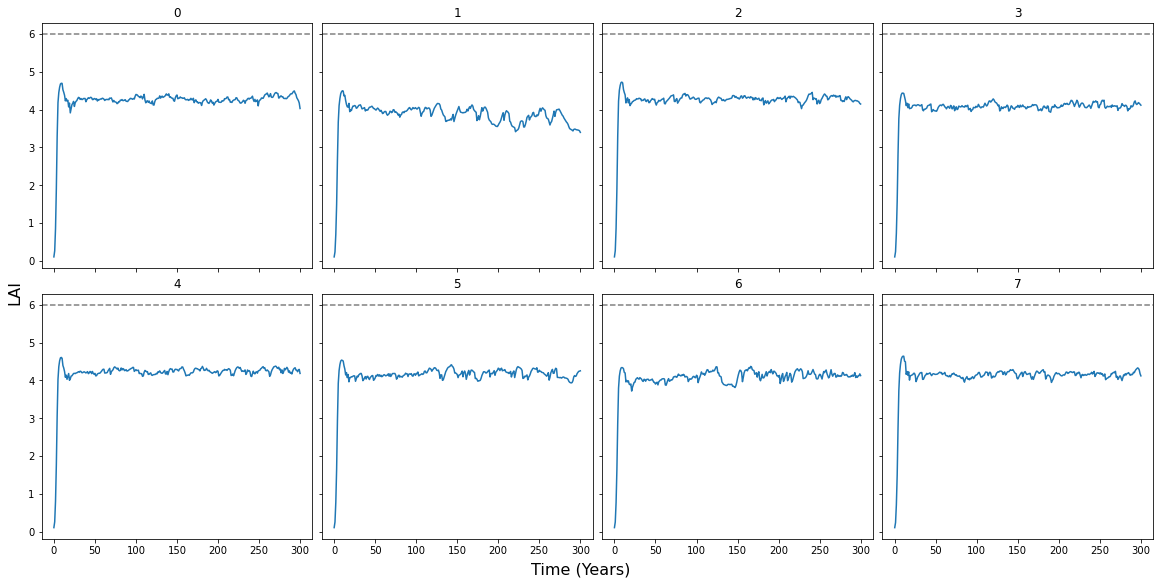

In [16]:
fig1, axs = plt.subplots(nrows=2,ncols=4, figsize=(16,8), constrained_layout=True, sharex=True, sharey=True)
axs=axs.flatten()

for  i in range(0,num):
    axs[i].plot(time, lai[i,:])   
    axs[i].set_title(i)
    axs[i].axhline(y=6, color='grey', linestyle='--')
    
fig1.supxlabel(r'Time (Years)', fontsize=16)
fig1.supylabel(r'LAI', fontsize=16)
